In [1]:
import trainer as t

Using TensorFlow backend.


In [20]:
from importlib import reload
reload(t)

<module 'trainer' from '/Users/paulm/code/web-traffic-time-series-forecasting/trainer.py'>

# DataSet

In [2]:
d = t.DataSet()

In [3]:
d.num_keys()

145063

In [4]:
rindex = 144278

In [5]:
d.process_index(rindex, 20, 10)

In [6]:
d.x.shape, d.y.shape

((520, 20, 1), (520, 10))

# Model

In [7]:
ctx = t.train_model(d, max=64, epochs=10)

In [8]:
import pandas as pd
%matplotlib inline
figsize=(20,4)
def plot_loss(ctx):
    print(ctx.train_time)
    pd.DataFrame({"loss": ctx.history['loss']}).plot(figsize=figsize)

61.890262419001374


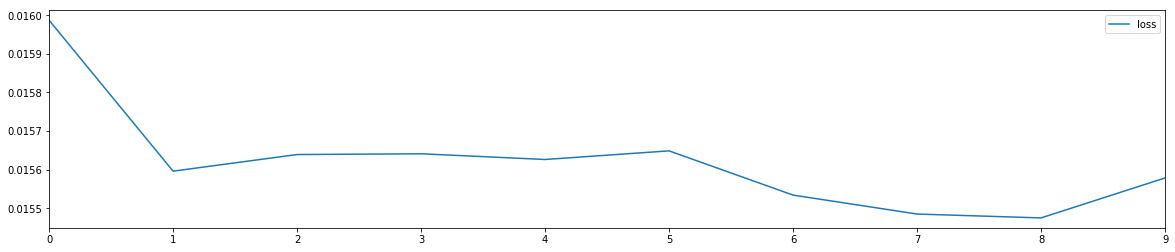

In [9]:
plot_loss(ctx)

In [10]:
ctx.save()

In [11]:
%ls

Explore Data.ipynb
Model Eval.ipynb
Train Something.ipynb
__pycache__/
data/
datafix.sh*
example_scaler
exhist.pkl
exscaler.pkl
foo.pkl
o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010.pkl
o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010_weights.h5
trainer.py
u128_o20_p10.h5
u64_o10_p10.h5
u64_o1_p2.h5


In [12]:
ctx = t.train_model(d, max=64, cells=2, epochs=10)

115.37053201600065


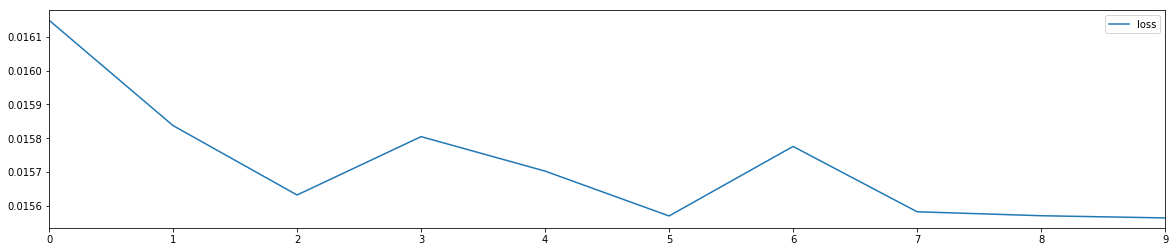

In [13]:
plot_loss(ctx)

In [14]:
ctx.save()

In [15]:
%ls

Explore Data.ipynb
Model Eval.ipynb
Train Something.ipynb
__pycache__/
data/
datafix.sh*
example_scaler
exhist.pkl
exscaler.pkl
foo.pkl
o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010.pkl
o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010_weights.h5
o0020_p0010_m0000_M0064_u064_c002_lr1.000000e-03_e0010.pkl
o0020_p0010_m0000_M0064_u064_c002_lr1.000000e-03_e0010_weights.h5
trainer.py
u128_o20_p10.h5
u64_o10_p10.h5
u64_o1_p2.h5


In [16]:
onex = d.x[len(d.x)-1].reshape((1,)+d.x.shape[1:])

In [17]:
ctx.model.predict(onex)

array([[ 0.0689598 ,  0.05476187,  0.04919352,  0.06697828,  0.04870661,
         0.07030575,  0.05119092,  0.06488928,  0.06936778,  0.07236516]], dtype=float32)

In [21]:
ctx = t.TrainContext.load(20, 10, 0, 64, 64, 1, 1e-3, 10)

In [22]:
ctx.model.predict(onex)

array([[ 0.06870272,  0.05410646,  0.06620583,  0.06649578,  0.06649643,
         0.05369204,  0.05318965,  0.0548696 ,  0.07056054,  0.05997733]], dtype=float32)

# Actual Size Now

In [12]:
help(d.scaler)

Help on MinMaxScaler in module sklearn.preprocessing.data object:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, i.e. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : boolean, optional, default True
 |      Set to False to perform inplace row normalization and avoid a
 |  

In [13]:
ctx.scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
import pickle

In [17]:
pickle.dumps(ctx.scaler)

b'\x80\x03csklearn.preprocessing.data\nMinMaxScaler\nq\x00)\x81q\x01}q\x02(X\r\x00\x00\x00feature_rangeq\x03K\x00K\x01\x86q\x04X\x04\x00\x00\x00copyq\x05\x88X\x0f\x00\x00\x00n_samples_seen_q\x06M&\x02X\x06\x00\x00\x00scale_q\x07cnumpy.core.multiarray\n_reconstruct\nq\x08cnumpy\nndarray\nq\tK\x00\x85q\nC\x01bq\x0b\x87q\x0cRq\r(K\x01K\x01\x85q\x0ecnumpy\ndtype\nq\x0fX\x02\x00\x00\x00f4q\x10K\x00K\x01\x87q\x11Rq\x12(K\x03X\x01\x00\x00\x00<q\x13NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x14b\x89C\x04\xd4\x1f\xb1;q\x15tq\x16bX\x04\x00\x00\x00min_q\x17h\x08h\tK\x00\x85q\x18h\x0b\x87q\x19Rq\x1a(K\x01K\x01\x85q\x1bh\x12\x89C\x04\xd4\x1f\xb1\xbbq\x1ctq\x1dbX\t\x00\x00\x00data_min_q\x1eh\x08h\tK\x00\x85q\x1fh\x0b\x87q Rq!(K\x01K\x01\x85q"h\x12\x89C\x04\x00\x00\x80?q#tq$bX\t\x00\x00\x00data_max_q%h\x08h\tK\x00\x85q&h\x0b\x87q\'Rq((K\x01K\x01\x85q)h\x12\x89C\x04\x00\x00:Cq*tq+bX\x0b\x00\x00\x00data_range_q,h\x08h\tK\x00\x85q-h\x0b\x87q.Rq/(K\x01K\x01\x85q0h\x12\x89C\x04\x00\x009Cq1tq2bX\x10\x00\

In [19]:
pickle.dump(ctx.scaler, open("exscaler.pkl", "wb"))

In [20]:
scaler = pickle.load(open("exscaler.pkl", "rb"))

In [21]:
pickle.dumps(scaler)

b'\x80\x03csklearn.preprocessing.data\nMinMaxScaler\nq\x00)\x81q\x01}q\x02(X\r\x00\x00\x00feature_rangeq\x03K\x00K\x01\x86q\x04X\x04\x00\x00\x00copyq\x05\x88X\x0f\x00\x00\x00n_samples_seen_q\x06M&\x02X\x06\x00\x00\x00scale_q\x07cnumpy.core.multiarray\n_reconstruct\nq\x08cnumpy\nndarray\nq\tK\x00\x85q\nC\x01bq\x0b\x87q\x0cRq\r(K\x01K\x01\x85q\x0ecnumpy\ndtype\nq\x0fX\x02\x00\x00\x00f4q\x10K\x00K\x01\x87q\x11Rq\x12(K\x03X\x01\x00\x00\x00<q\x13NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x14b\x89C\x04\xd4\x1f\xb1;q\x15tq\x16bX\x04\x00\x00\x00min_q\x17h\x08h\tK\x00\x85q\x18h\x0b\x87q\x19Rq\x1a(K\x01K\x01\x85q\x1bh\x12\x89C\x04\xd4\x1f\xb1\xbbq\x1ctq\x1dbX\t\x00\x00\x00data_min_q\x1eh\x08h\tK\x00\x85q\x1fh\x0b\x87q Rq!(K\x01K\x01\x85q"h\x12\x89C\x04\x00\x00\x80?q#tq$bX\t\x00\x00\x00data_max_q%h\x08h\tK\x00\x85q&h\x0b\x87q\'Rq((K\x01K\x01\x85q)h\x12\x89C\x04\x00\x00:Cq*tq+bX\x0b\x00\x00\x00data_range_q,h\x08h\tK\x00\x85q-h\x0b\x87q.Rq/(K\x01K\x01\x85q0h\x12\x89C\x04\x00\x009Cq1tq2bX\x10\x00\

In [25]:
pickle.dump(ctx.history.history, open("exhist.pkl", "wb"))

In [24]:
ctx.history.history

{'loss': [0.016162874123438087,
  0.015818831095202768,
  0.015793882625985134,
  0.015695361184498324,
  0.015614255592936388,
  0.015560062457097956,
  0.015631850952559034,
  0.015584970775307738,
  0.015549170339909324,
  0.015586084927235788]}

In [26]:
pickle.load(open("exhist.pkl", "rb"))

{'loss': [0.016162874123438087,
  0.015818831095202768,
  0.015793882625985134,
  0.015695361184498324,
  0.015614255592936388,
  0.015560062457097956,
  0.015631850952559034,
  0.015584970775307738,
  0.015549170339909324,
  0.015586084927235788]}

In [28]:
with open("foo.pkl", "wb") as f:
    pickle.dump(ctx.scaler, f)
    pickle.dump(ctx.history.history, f)
    pickle.dump(ctx.train_time, f)

In [30]:
with open("foo.pkl", "rb") as f:
    scaler = pickle.load(f)
    history = pickle.load(f)
    train_time = pickle.load(f)

In [31]:
train_time

114.99761650899745

In [42]:
print('%e' % 1e-3)

1.000000e-03


In [43]:
d

In [46]:
d.x.shape[1:]

(20, 1)

In [47]:
(d.x.shape[1], ) + (1,)

(20, 1)